In [5]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("img/solutions")
output_dir.mkdir(exist_ok=True)

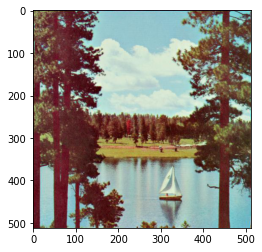

In [6]:
im = read_im(pathlib.Path("img", "lake.jpg"))
plt.imshow(im)

In [7]:
def convolve_im(im, kernel,
    ):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [kernel_height, kernel_height]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    (image_height, image_width, image_n_channels) = im.shape
    (kernel_height, kernel_width) = kernel.shape
    n_padding_layers = kernel_height // 2 # zero-padding offset

    assert len(im.shape) == 3, "The image have to have three dimensions"
    assert kernel_height == kernel_width, "The kernel is assumed to be square"
    assert image_n_channels == 3, "RGB"

    res_img = im.copy()
    im_padded = np.stack([np.pad(im[...,c], n_padding_layers, mode='constant') for c in range(image_n_channels)], axis=2)
    filter_rotated = np.rot90(kernel, 2) # For performing cross-correlation instead, giving the desired result

    for y in range(image_height):
        for x in range(image_width):
            for c in range(image_n_channels):
                # element wise multiplication with rotated filter
                product_matrix = np.multiply(im_padded[y:y+kernel_height, x:x+kernel_width, c], filter_rotated)
                
                # The convolution is now the sum of each entry in the product_matrix calculated above
                res_img[y, x, c] = product_matrix.sum()



    return res_img

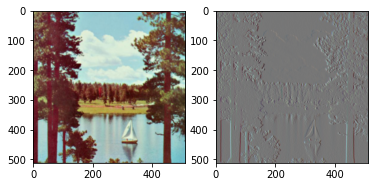

In [8]:
if __name__ == "__main__":
    # Define the convolutional kernels
    h_b = 1 / 256  * np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1]
    ])
    sobel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])

    # Convolve images
    im_smoothed = convolve_im(im.copy(), h_b)
    save_im(output_dir.joinpath("lake_smoothed.jpg"), im_smoothed)
    im_sobel = convolve_im(im, sobel_x)
    save_im(output_dir.joinpath("lake_sobel.jpg"), im_sobel)

    # DO NOT CHANGE. Checking that your function returns as expected
    assert isinstance(im_smoothed, np.ndarray),         f"Your convolve function has to return a np.array. " +        f"Was: {type(im_smoothed)}"
    assert im_smoothed.shape == im.shape,         f"Expected smoothed im ({im_smoothed.shape}" +         f"to have same shape as im ({im.shape})"
    assert im_sobel.shape == im.shape,         f"Expected smoothed im ({im_sobel.shape}" +         f"to have same shape as im ({im.shape})"
    plt.subplot(1, 2, 1)
    plt.imshow(normalize(im_smoothed))

    plt.subplot(1, 2, 2)
    plt.imshow(normalize(im_sobel))
    plt.show()